## 1. Import des librairies

In [1]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics

sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 2. Chargement des données

In [2]:
df = pd.read_csv("data/clean.csv", index_col=["Unnamed: 0"])

In [3]:
df

,tags,document
2,node.js,restart node upon change file For someone come...
3,html css,100 min height css layout What best way make e...
4,regex language-agnostic,stack overflow generate seofriendly urls What ...
5,java,get oslevel system information I currently bui...
6,security,disable browser ave password functionality One...
...,...,...
16368,oop,difference interface abstract class What exact...
16370,ios xcode,symbolicate crash log xcode Xcode 5 organizer ...
16371,java spring,spring boot multiple external configuration fi...
16372,java c++,java final vs c++ const The Java C programmers...


In [4]:
df["tags"] = df["tags"].apply(lambda x: x.split())

## 3. Analyse non-supervisé

### 3.1. Transformation texte en matrice TF-IDF

In [5]:
def find_optimal_cluster(data, max_k):
    iters = range(1, max_k+1, 5)
    sse = []
    
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    fig, ax = plt.subplots(1,1, figsize=(15, 5))
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Nombre de Clusters')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title("SSE par nombre de clusters")
    plt.tight_layout()
    plt.show()
    
    
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
def get_top_keywords(data, clusters, labels, n_terms):
    temp_df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i, r in temp_df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

### 3.2. Matrice monogramme

In [6]:
tf_idf_vectorizer_mono = TfidfVectorizer(ngram_range=(1,1))

In [7]:
tf_idf_matrix_mono = tf_idf_vectorizer_mono.fit_transform(df["document"].values)

In [8]:
tf_idf_matrix_mono.shape

(14987, 71421)

Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters
Fit 41 clusters
Fit 46 clusters
Fit 51 clusters
Fit 56 clusters
Fit 61 clusters
Fit 66 clusters
Fit 71 clusters
Fit 76 clusters
Fit 81 clusters
Fit 86 clusters
Fit 91 clusters
Fit 96 clusters
Fit 101 clusters
Fit 106 clusters
Fit 111 clusters
Fit 116 clusters
Fit 121 clusters
Fit 126 clusters
Fit 131 clusters
Fit 136 clusters
Fit 141 clusters
Fit 146 clusters
Fit 151 clusters
Fit 156 clusters
Fit 161 clusters
Fit 166 clusters
Fit 171 clusters
Fit 176 clusters
Fit 181 clusters
Fit 186 clusters
Fit 191 clusters
Fit 196 clusters


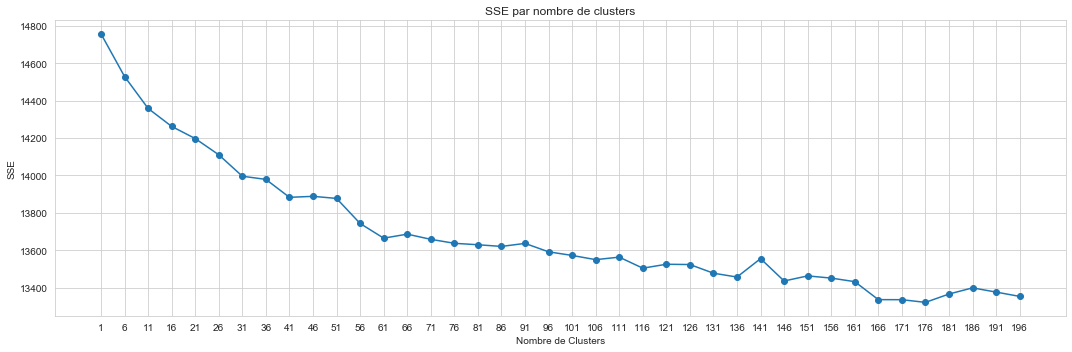

In [9]:
find_optimal_cluster(tf_idf_matrix_mono, 200)

In [10]:
clusters = MiniBatchKMeans(n_clusters=136, init_size=1024, batch_size=2048, random_state=20).fit_predict(tf_idf_matrix_mono)

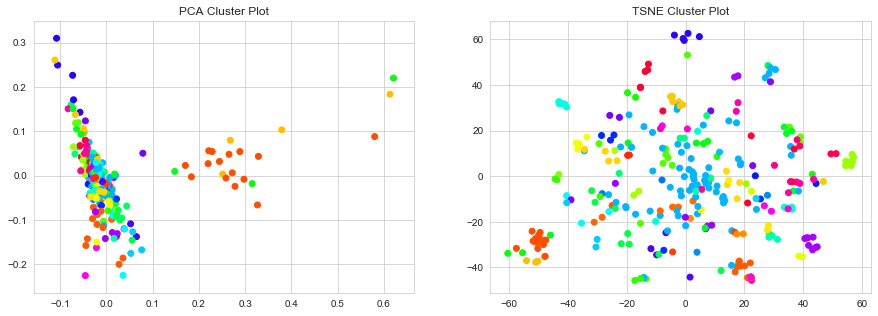

In [11]:
plot_tsne_pca(tf_idf_matrix_mono, clusters)

In [12]:
get_top_keywords(tf_idf_matrix_mono, clusters, tf_idf_vectorizer_mono.get_feature_names(), 10)


Cluster 0
versa,two,stage,stream,snippet,convert,output,thanks,outputstream,inputstream

Cluster 1
checkbox,string,object,get,use,value,id,class,type,name

Cluster 2
outputdirectory,move,dircreate,pathtomaindir,existence,directory,setwd,filepath,maindir,subdir

Cluster 3
necessary,string,loop,variables,dangerousincorrect,declare,outside,condition,str,calculatestr

Cluster 4
result,row,get,where,order,from,mysql,select,sql,query

Cluster 5
canvas,find,check,javascript,attribute,remove,class,dom,jquery,element

Cluster 6
executable,source,file,gcc,program,comandroidsupport,java,project,code,compile

Cluster 7
use,pull,change,clone,remote,commit,push,file,repository,git

Cluster 8
run,how,app,use,sdk,device,emulator,studio,application,android

Cluster 9
exit,python,how,process,unix,run,bash,command,script,shell

Cluster 10
require,how,express,run,file,server,use,nodejs,js,node

Cluster 11
selector,obj,potentially,typeof,check,var,oselector,jquery,dostuff,object

Cluster 12
prettyinformat

### 3.3. Matrice bigramme

In [13]:
tf_idf_vectorizer_bi = TfidfVectorizer(ngram_range=(2,2))

In [14]:
tf_idf_matrix_bi = tf_idf_vectorizer_bi.fit_transform(df["document"].values)

In [15]:
tf_idf_matrix_bi.shape

(14987, 536365)

Fit 1 clusters
Fit 6 clusters
Fit 11 clusters
Fit 16 clusters
Fit 21 clusters
Fit 26 clusters
Fit 31 clusters
Fit 36 clusters
Fit 41 clusters
Fit 46 clusters
Fit 51 clusters
Fit 56 clusters
Fit 61 clusters
Fit 66 clusters
Fit 71 clusters
Fit 76 clusters
Fit 81 clusters
Fit 86 clusters
Fit 91 clusters
Fit 96 clusters
Fit 101 clusters
Fit 106 clusters
Fit 111 clusters
Fit 116 clusters
Fit 121 clusters
Fit 126 clusters
Fit 131 clusters
Fit 136 clusters
Fit 141 clusters
Fit 146 clusters
Fit 151 clusters
Fit 156 clusters
Fit 161 clusters
Fit 166 clusters
Fit 171 clusters
Fit 176 clusters
Fit 181 clusters
Fit 186 clusters
Fit 191 clusters
Fit 196 clusters


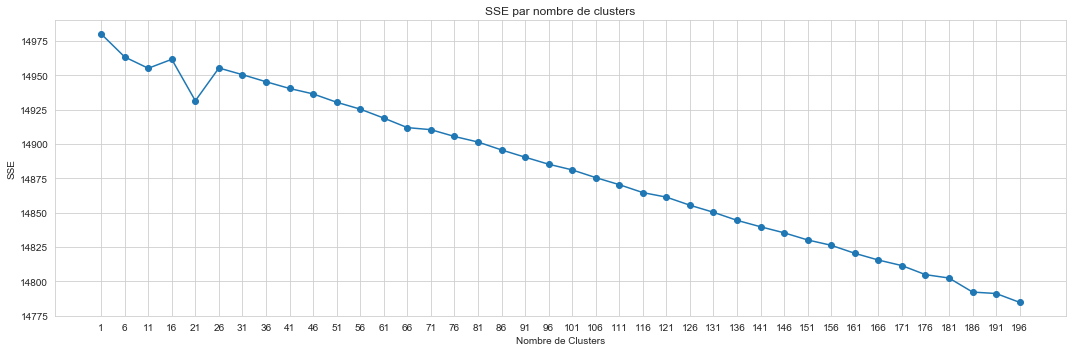

In [16]:
find_optimal_cluster(tf_idf_matrix_bi, 200)

In [17]:
clusters = MiniBatchKMeans(n_clusters=186, init_size=1024, batch_size=2048, random_state=20).fit_predict(tf_idf_matrix_bi)

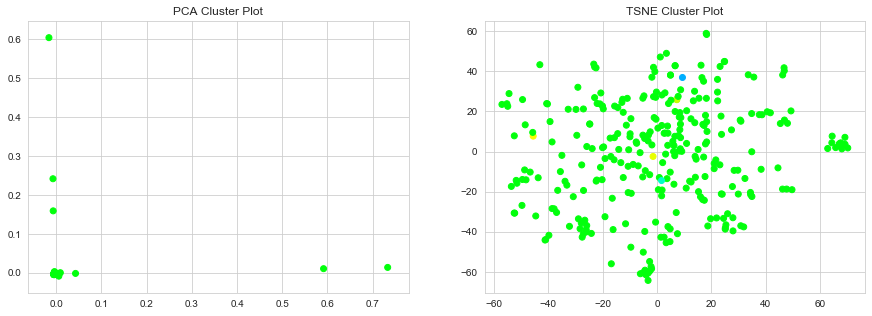

In [18]:
plot_tsne_pca(tf_idf_matrix_bi, clusters)

In [19]:
get_top_keywords(tf_idf_matrix_bi, clusters, tf_idf_vectorizer_bi.get_feature_names(), 10)


Cluster 0
apple work,interact 3rd,trick longer,cookie iframe,close loophole,get 3rd,party cookies,cookies safari,use trick,3rd party

Cluster 1
casesensitive however,include child,elementgetelementbyxpath return,elementtext property,equal divouter,parent test,div class,selenium webdriver,divouter also,my button

Cluster 2
pay one,concensus however,work wont,successful even,mind always,wait fall,deeper try,collections still,later cost,kind know

Cluster 3
array var,item items,item javascript,items array,var items,5346 how,523345233431 5346,array 523345233431,get random,random item

Cluster 4
eventid 120,set eventid,copy need,copy select,field large,155 how,eventid 155,table eventid,want copy,copy row

Cluster 5
reason pseudocode,null bad,variable objectmethod,hear voice,pseudocode variable,value methods,voice say,objectmethod null,return null,bad design

Cluster 6
justin usable,purely hypothetically,graph are,answer justin,slow solution,isare fastest,maze follow,one way,the second,solv

do is,key do,javascript consider,consider key,xhasownproperty key,key xhasownproperty,check object,property javascript,specific property,object specific

Cluster 58
events fire,element check,are events,transition events,wether css3,fire element,events are,transition start,check wether,css3 transition

Cluster 59
alphabets like,5x users,cyrillic alphabets,setup follow,opera 9x,users mainly,jsp framework,work java,get utf8,utf8 work

Cluster 60
price 543,pork price,fruit price,350 array,type fruit,milk price,inventory array,type pork,price 350,array type

Cluster 61
want small,database softwares,resources could,small net,know light,choice database,much resources,small light,light weight,weight database

Cluster 62
interest multiline,write computed,quote vim,select computed,ask nice,coefficients for,select bracket,bracket quote,computed solution,solution coefficients

Cluster 63
last char,stringsize return,comment include,stringsize int,flag produce,cstring stringsize,cstring printf,int s

similar success,edit prefer,silly invent,ready go,wheel someone,libraryclass code,ldap php,directory provider,success edit,active directory

Cluster 112
jce unlimited,reference policy,jce policy,install my,distribute end,end user,make app,file instal,unlimited strength,policy file

Cluster 113
mimetypes simply,wide configuration,howto serve,launch every,eg mimetypes,simply launch,configuration eg,current directory,directory command,serve current

Cluster 114
fast bonus,vs decrease,converge differently,look long,rate increase,number change,per second,frame per,calculate frame,second game

Cluster 115
get current,date time,date format,windows command,current datetime,datetime format,regional settings,mydatetime set,mydatetime mydatetime,set mydatetime

Cluster 116
generate django,solutions add,showlog orm,unexpected sql,log notice,notice several,sql print,django orm,python shell,sql call

Cluster 117
new know,question variable,hope understand,nonetype need,return nonetype,nonetype python

control custom,invalid also,api rather,validation angularjs,tap validation,mark field,might thing,method formcontroller,would tap,custom validation

Cluster 168
know sell,pretty soon,ownership another,ownership iphone,mechanism can,new owner,move app,app another,another company,sell app

Cluster 169
ajaxonreadystatechange function,testsavephp false,canvasdata canvastodataurl,canvastodataurl imagepng,var canvasdata,ajaxsetrequestheader contenttype,ajaxsend imgdata,imgdata canvasdata,ajaxopen post,ajax new

Cluster 170
stupid user,orm database,orm confirm,implement discrete,satisfy load,unit test,unit testing,test database,databasedriven applications,test orm

Cluster 171
decode example,systemoutprintln bsdecode,base64 bs,base64 bsencodebytes,bytearray sourcegetbytes,source password,base64 use,bytearray systemoutprintln,bsdecode bsencodebytes,bsencodebytes bytearray

Cluster 172
argumentslength return,function argumentslength,dy 15,assignments example,15 return,mathpi dy,wonder operator,

Pour notre problème (la recherche de mot clé) l'utilisation d'une matrice monogramme est plus pertinente.

### 3.4. LDA

In [20]:
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', learning_offset=50, random_state=20).fit(tf_idf_matrix_mono)

In [21]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic {}".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words -1: -1]]))

In [22]:
display_topics(lda, tf_idf_vectorizer_mono.get_feature_names(), 5)


Topic 0
vcvarsallbat getsharedpreferences getdefaultsharedpreferences addpreferencesfromresource preferencefragment

Topic 1
filelist threadpoolexecutorjava cleartext screenname domdocument

Topic 2
warehouse tracking transitioncontext tiendas coefficients

Topic 3
wsystemerr asd activitythreadjava javalangruntimeexception pandasparserc

Topic 4
addressbook dbcolumn dbstringproperty armappledarwin10g421 quartzcore

Topic 5
myint interop gyp db2 mms

Topic 6
alltext pprint secdiff adict 86400365

Topic 7
monkey 19216811 huawei animage onchanged

Topic 8
italic 054 amet dolor containerheight

Topic 9
mongoose execjs favoritefoods optdir mysql2

Topic 10
528205 ifor 20140317 genders 20140419

Topic 11
gridarrange dockercomposeyml composer displayerrors tortoisesvn

Topic 12
dun navigationview inputimage newprice mcryptrijndael256

Topic 13
activation modeladd rmagick loadmodule ifmodule

Topic 14
mov transactionscope chrono rax kokos

Topic 15
date2 webmethod 0x1839b38 20110815 date1

To

### 3.5. NMF

In [23]:
nmf = NMF(n_components=20, max_iter=5, random_state=20).fit(tf_idf_matrix_mono)

In [24]:
display_topics(nmf, tf_idf_vectorizer_mono.get_feature_names(), 5)


Topic 0
use would code like one

Topic 1
git commit repository branch file

Topic 2
string convert character int char

Topic 3
view button app page change

Topic 4
android layoutwidth layoutheight wrapcontent studio

Topic 5
div height id width html

Topic 6
table database mysql sql query

Topic 7
function var return call jquery

Topic 8
class file public static java

Topic 9
python print module import directory

Topic 10
124 null grep group mysql

Topic 11
array java convert int numpy

Topic 12
run error install command try

Topic 13
request url json data http

Topic 14
javascript object date convert format

Topic 15
difference image what docker use

Topic 16
line command file text vim

Topic 17
value key jquery input type

Topic 18
branch script php shell master

Topic 19
list item number sort get


In [33]:
df["document"][2]

'restart node upon change file For someone come PHP background process kill node start every code change seem tedious Is flag start script node automatically restart node code change save'

In [40]:
tfidf_mono_features_nm = tf_idf_vectorizer_mono.get_feature_names()

In [52]:
def top_tags_from_nmf(x, vec_model, nmf_mod, score_min=0.05):
    """Returns dictionnary with words maximally associated to document and their relative NMF score.
    Score of words are calculated by multiplication between NMF transformed W matrix and NMF fitted H
    (vocabulary) value to get importance of each words into topic definition.
    Args:
        x: Token to be analyzed (list of ngrams)
        vec_model: Vectorizer model used for TFIDF calculation
        nmf_mod: Trained NMF model
        score_min: threshold score for keeping word
    """
    tfidf_target = vec_model.transform(x)
    target_nmf_trans = nmf_mod.transform(tfidf_target)
    
    tags_scores = np.dot(target_nmf_trans, nmf_mod.components_).tolist()[0]

    dict_tags_score = dict(zip(tfidf_mono_features_nm, tags_scores))
    
    return { k: v for k, v in dict_tags_score.items() if v >= score_min }


In [53]:
top_tags_from_nmf([df["document"][2]], tf_idf_vectorizer_mono, nmf, score_min=0.05)

{'branch': 0.06275273512352307, 'script': 0.0571124107319197}

## 4. Analyse supervisé

### 4.1. Sépération dans jeu d'entrainement et jeu de test

In [85]:
X = df["document"]
y = df["tags"]

In [86]:
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y)

In [87]:
mlb.classes_

array(['.net', 'ajax', 'algorithm', 'android', 'android-fragments',
       'android-studio', 'angular', 'angularjs', 'arrays', 'asp.net',
       'asp.net-mvc', 'bash', 'c', 'c#', 'c++', 'c++11', 'class',
       'cocoa-touch', 'command-line', 'css', 'csv', 'data-structures',
       'database', 'dataframe', 'date', 'datetime', 'debugging',
       'design-patterns', 'dictionary', 'django', 'docker', 'eclipse',
       'exception', 'express', 'file', 'file-io', 'function', 'generics',
       'git', 'github', 'google-chrome', 'html', 'http', 'image', 'ios',
       'iphone', 'java', 'javascript', 'jquery', 'json',
       'language-agnostic', 'linux', 'list', 'logging', 'macos', 'math',
       'mongodb', 'multithreading', 'mysql', 'node.js', 'npm', 'object',
       'objective-c', 'oop', 'pandas', 'performance', 'php', 'pip',
       'postgresql', 'python', 'r', 'r-faq', 'reactjs', 'regex', 'rest',
       'ruby', 'ruby-on-rails', 'scripting', 'security', 'shell',
       'sorting', 'spring', 'sql

In [88]:
vectorizer_X = TfidfVectorizer(min_df=0.0, max_features=200000, ngram_range=(1,1))

In [89]:
X_tfidf = vectorizer_X.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_bin, test_size=0.2, random_state=20)

In [91]:
print("Nombre de données dans le training set : ", X_train.shape[0])
print("Nombre de données dans le test set : ", X_test.shape[0])

Nombre de données dans le training set :  11989
Nombre de données dans le test set :  2998


### 4.2. Modélisations

In [92]:
def avg_jaccard(y_test, y_pred):
    '''
    see https://en.wikipedia.org/wiki/Multi-label_classification#Statistics_and_evaluation_metrics
    '''
    jacard = np.minimum(y_test, y_pred).sum(axis=1) / \
        np.maximum(y_test, y_pred).sum(axis=1)
    return jacard.mean()*100


def get_score(y_pred, model, submodel=""):
    classifier_name = model.__class__.__name__
    macro_f1_score = metrics.f1_score(y_test, y_pred, average="macro")
    micro_f1_score = metrics.f1_score(y_test, y_pred, average="micro")
    jaccard_score = avg_jaccard(y_test, y_pred)
    hamming_loss = metrics.hamming_loss(y_test, y_pred)
    data = {"Macro F1 Score": macro_f1_score, "Micro F1 Score": micro_f1_score,
            "Jaccard Score": jaccard_score, "Hamming_loss": hamming_loss}
    if(submodel):
        return pd.DataFrame(data=data, index=[submodel])
    else:
        return pd.DataFrame(data=data, index=[classifier_name])

In [93]:
df.loc[[2, 3, 4, 5, 6]]

,tags,document
2,[node.js],restart node upon change file For someone come...
3,"[html, css]",100 min height css layout What best way make e...
4,"[regex, language-agnostic]",stack overflow generate seofriendly urls What ...
5,[java],get oslevel system information I currently bui...
6,[security],disable browser ave password functionality One...


In [94]:
def predict_5_questions(model):
    questions = df.loc[[2, 3, 4, 5, 6]]["document"]
    X_tfidf = vectorizer_X.transform(questions)
    prediction_inv = model.predict(X_tfidf)
    prediction = mlb.inverse_transform(prediction_inv)
    print(prediction)

#### 4.2.1. DummyClassifier

In [95]:
clf = OneVsRestClassifier(DummyClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
dummy_score = get_score(y_pred, clf, "DummyClassifier")
dummy_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
DummyClassifier,0.015163,0.043245,2.499126,0.030994


In [96]:
predict_5_questions(clf)

[(), ('file', 'iphone'), ('arrays', 'java'), ('r',), ('java',)]


#### 4.2.2. RandomForestClassifier

In [97]:
clf = RandomForestClassifier(random_state=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rfc_score = get_score(y_pred, clf)
rfc_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
RandomForestClassifier,0.13009,0.312223,22.239827,0.013476


In [98]:
predict_5_questions(clf)

[('node.js',), ('css', 'html'), ('language-agnostic', 'regex'), ('java',), ('security',)]


#### 4.2.3. LogisticRegression

In [99]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
lr_score = get_score(y_pred, clf, "LogisticRegression")
lr_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
LogisticRegression,0.22571,0.447734,32.41272,0.011948


In [100]:
predict_5_questions(clf)

[('node.js',), ('css',), (), ('java',), ()]


#### 4.2.4. SGDClassifier 

In [101]:
clf = OneVsRestClassifier(SGDClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
sgdc_score = get_score(y_pred, clf, "SGDClassifier")
sgdc_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
SGDClassifier,0.464377,0.634719,51.726151,0.009229


In [102]:
predict_5_questions(clf)

[('node.js',), ('css', 'html'), ('regex',), ('java',), ()]


#### 4.2.5. MultinomialNB

In [103]:
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mnb_score = get_score(y_pred, clf, "MultinomialNB")
mnb_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
MultinomialNB,0.00141,0.006504,0.494774,0.016304


In [104]:
predict_5_questions(clf)

[(), (), (), (), ()]


#### 4.2.6. LinearSVC

In [105]:
clf = OneVsRestClassifier(LinearSVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
svc_score = get_score(y_pred, clf, "LinearSVC")
svc_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
LinearSVC,0.504072,0.649911,53.410607,0.009199


In [106]:
predict_5_questions(clf)

[('node.js',), ('css', 'html'), ('language-agnostic', 'regex'), ('java',), ('security',)]


#### 4.2.7. Perceptron

In [107]:
clf = OneVsRestClassifier(Perceptron())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
perceptron_score = get_score(y_pred, clf, "Perceptron")
perceptron_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
Perceptron,0.528576,0.631818,53.077369,0.010831


In [108]:
predict_5_questions(clf)

[('node.js',), ('css', 'html'), ('language-agnostic', 'regex'), ('java',), ('security',)]


#### 4.2.8. PassiveAggressiveClassifier

In [109]:
clf = OneVsRestClassifier(PassiveAggressiveClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
pac_score = get_score(y_pred, clf, "PassiveAggressiveClassifier")
pac_score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
PassiveAggressiveClassifier,0.550473,0.657489,55.381365,0.00971


In [110]:
predict_5_questions(clf)

[('node.js',), ('css', 'html'), ('language-agnostic', 'regex'), ('java',), ('security',)]


#### 4.2.9. MultiLayerPerceptron Classifier

In [111]:
mlcp = MLPClassifier(max_iter=100, verbose=True)
mlcp.fit(X_train, y_train)
y_pred = mlcp.predict(X_test)
mlpc_score = get_score(y_pred, mlcp)
mlpc_score

Iteration 1, loss = 52.22958615


,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
MLPClassifier,0.0,0.0,0.0,0.016351


In [112]:
predict_5_questions(mlcp)

[(), (), (), (), ()]


In [113]:
def highlight(val):
    is_max = val == val.max()
    return ['color: green' if v else '' for v in is_max]

def highlight_hamming(val):
    is_min = val == val.min()
    return ['color: green' if v else '' for v in is_min]

In [114]:
score = pd.concat([rfc_score, lr_score, dummy_score, sgdc_score, mnb_score, svc_score, perceptron_score, pac_score, mlpc_score])
score = score.style.apply(highlight, subset=["Macro F1 Score", "Micro F1 Score", "Jaccard Score"])
score = score.apply(highlight_hamming, subset=["Hamming_loss"])
score

,Macro F1 Score,Micro F1 Score,Jaccard Score,Hamming_loss
RandomForestClassifier,0.13009,0.312223,22.2398,0.0134757
LogisticRegression,0.22571,0.447734,32.4127,0.011948
DummyClassifier,0.0151629,0.0432455,2.49913,0.030994
SGDClassifier,0.464377,0.634719,51.7262,0.00922949
MultinomialNB,0.00141013,0.00650407,0.494774,0.0163042
LinearSVC,0.504072,0.649911,53.4106,0.00919947
Perceptron,0.528576,0.631818,53.0774,0.0108306
PassiveAggressiveClassifier,0.550473,0.657489,55.3814,0.00970981
MLPClassifier,0,0,0,0.0163509


### 4.3. Amélioration des hyperparamètres

In [47]:
param_grid = {'estimator__C':[1, 10, 100, 1000]}

## 5. Enregistrement du meilleur model

In [48]:
clf = OneVsRestClassifier(SGDClassifier())
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal',
                                            loss='hinge', max_iter=1000,
                                            n_iter_no_change=5, n_jobs=None,
                                            penalty='l2', power_t=0.5,
                                            random_state=None, shuffle=True,
                                            tol=0.001, validation_fraction=0.1,
                                            verbose=0, warm_start=False),
                    n_jobs=None)

In [49]:
import pickle

# Enregistrement du model
with open('webapp/model/model.pkl', 'wb') as file:
    pickle.dump(clf, file)
    
# Enregistrement de TFIDFVectorizer
with open('webapp/model/vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer_X, file)
    
# Enregistrement de MultiLabelBinarizer
with open('webapp/model/mlb.pkl', 'wb') as file:
    pickle.dump(mlb, file)